# Predicting Price of Car using Machine Learning Algorithms

### Importing the Dependencies

In [41]:
import numpy as np
import pandas as pd

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection 

In [42]:
# loading the data from csv file to pandas dataframe
car_price = pd.read_csv('car data.csv')

# inspecting the first 5 rows of the dataframe
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
# checking the number of rows and columns
car_price.shape

(301, 9)

### Data Cleaning and Preprocessing

In [44]:
# getting some information about the dataset
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
# getting statistical data of the dataset
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [46]:
# Checking for duplicate values
car_price.drop_duplicates()
car_price.shape

(301, 9)

In [47]:
# Finding the number of 0's in columns
cols = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission']

for col in cols:
    value_0 = (car_price[col] == 0).sum()
    print(col,':',value_0)

Car_Name : 0
Year : 0
Selling_Price : 0
Present_Price : 0
Kms_Driven : 0
Fuel_Type : 0
Seller_Type : 0
Transmission : 0


columns don't have any zero values

### Handling Missing Values

In [48]:
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

we don't have any missing values

### Handling Outliers

C:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

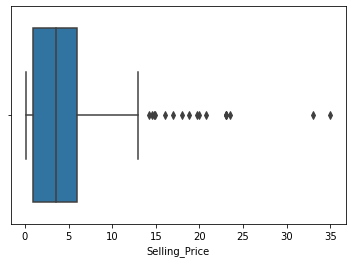

In [49]:
sns.boxplot(car_price['Selling_Price'])

In [50]:
car_price = car_price[~(car_price['Selling_Price']>=25.0)]
car_price.shape

(299, 9)

C:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present_Price'>

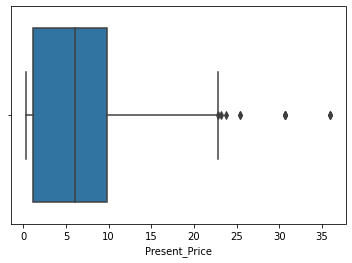

In [51]:
sns.boxplot(car_price['Present_Price'])

In [52]:
car_price = car_price[~(car_price['Present_Price']>=25.0)]
car_price.shape

(289, 9)

### Handling Categorical Values

In [53]:
categorical = car_price.dtypes[car_price.dtypes == 'object'].index
print(categorical)

car_price[categorical].describe()

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


,Car_Name,Fuel_Type,Seller_Type,Transmission
count,289,289,289,289
unique,97,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,184,260


In [54]:
print(car_price.Fuel_Type.value_counts())
print(car_price.Seller_Type.value_counts())
print(car_price.Transmission.value_counts())

Petrol    239
Diesel     48
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        184
Individual    105
Name: Seller_Type, dtype: int64
Manual       260
Automatic     29
Name: Transmission, dtype: int64


In [55]:
# encoding "Fuel_Type" Column
car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_price.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_price.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

car_price['Selling_Price'] = label_encoder.fit_transform(car_price['Selling_Price'])

car_price['Car_Name'] = label_encoder.fit_transform(car_price['Car_Name'])

### Feature Selection

<AxesSubplot:>

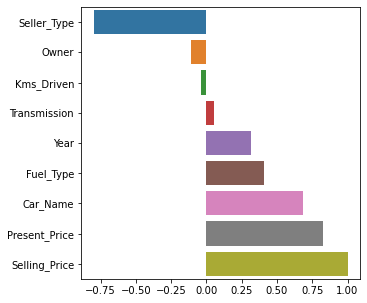

In [57]:
plt.figure(figsize=(5,5))
corr_feat_series = pd.Series.sort_values(car_price.corrwith(car_price.Selling_Price))
sns.barplot(x = corr_feat_series, y =corr_feat_series.index, orient ='h')

In [58]:
# According to analysis,'Owner','Kms_Driven' and 'Transmission' have less correlation with Selling_Price column. So, droping them
car_price.drop(['Owner','Kms_Driven','Transmission'], axis=1, inplace=True)

### Splitting the dependent and independent features

In [59]:
X = car_price.drop(['Selling_Price'],axis=1)
Y = car_price['Selling_Price']
print(X,'\n',Y)

     Car_Name  Year  Present_Price  Fuel_Type  Seller_Type
0          89  2014           5.59          0            0
1          92  2013           9.54          1            0
2          68  2017           9.85          0            0
3          95  2011           4.15          0            0
4          91  2014           6.87          1            0
..        ...   ...            ...        ...          ...
296        69  2016          11.60          1            0
297        66  2015           5.90          0            0
298        69  2009          11.00          0            0
299        69  2017          12.50          1            0
300        66  2016           5.90          0            0

[289 rows x 5 columns] 
 0       59
1       78
2      112
3       52
4       76
      ... 
296    129
297     70
298     59
299    137
300     88
Name: Selling_Price, Length: 289, dtype: int64


### Splitting Training and Test data

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",Y_train.shape)
print("y test: ",Y_test.shape)

x train:  (202, 5)
x test:  (87, 5)
y train:  (202,)
y test:  (87,)


### Feature Scaling 

In [61]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

X_train = msc.fit_transform(X_train)
X_test = msc.transform(X_test)

In [62]:
X_train[:2,:]

array([[0.96842105, 0.64285714, 0.38392089, 0.5       , 0.        ],
       [0.73684211, 0.71428571, 0.77987962, 0.        , 0.        ]])

In [63]:
X_test[:2,:]

array([[0.70526316, 0.78571429, 0.49742046, 0.        , 0.        ],
       [0.28421053, 0.85714286, 0.00300946, 0.        , 1.        ]])

### Model Selection

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]

In [65]:
# Cross-Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train, Y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    score_list = cross_val_score(model, X_train, Y_train, cv = cv, scoring = r2)
    score = score_list.mean()
    return score

In [66]:
for model in models:
    print('Training Model: ', model)
    score = test_model(model, X_train, Y_train)
    print("Score of Models", score)

Training Model:  LinearRegression()
Score of Models 0.8843166425516541
Training Model:  RandomForestRegressor()
Score of Models 0.9550991216687399
Training Model:  GradientBoostingRegressor()
Score of Models 0.9594901108649376


### Model Training

In [67]:
# 1. Linear Regression

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [68]:
# 2. Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [69]:
# 3. Gradient Boosting Regressor

xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

GradientBoostingRegressor()

### Prediction on Trained data

In [70]:
# 1. Linear Regression
y_train_pred1 = lr.predict(X_train)

# 2. Random Forest Regressor
y_train_pred2 = rf.predict(X_train)

# 3. Gradient Boosting Regressor
y_train_pred3 = xgb.predict(X_train)

### Evaluating the Algorithm on Trained data

In [71]:
# 1. Linear Regression
score_train1 = metrics.r2_score(Y_train,y_train_pred1)
score_train1

0.8968886487768478

In [72]:
# 2. Random Forest Regressor
score_train2 = metrics.r2_score(Y_train,y_train_pred2)
score_train2

0.9926667505718633

In [73]:
# 3. Gradient Boosting Regressor
score_train3 = metrics.r2_score(Y_train,y_train_pred3)
score_train3

0.9925921201766761

### Prediction on Test data

In [74]:
# 1. Linear Regression
y_test_pred1 = lr.predict(X_test)

# 2. Random Forest Regressor
y_test_pred2 = rf.predict(X_test)

# 3. Gradient Boosting Regressor
y_test_pred3 = xgb.predict(X_test)

### Evaluating the Algorithm on Test data

In [75]:
# 1. Linear Regression
score_test1 = metrics.r2_score(Y_test,y_test_pred1)
score_test1

0.8803153048026597

In [76]:
# 2. Random Forest Regressor
score_test2 = metrics.r2_score(Y_test,y_test_pred2)
score_test2

0.9677706846978339

In [77]:
# 3. Gradient Boosting Regressor
score_test3 = metrics.r2_score(Y_test,y_test_pred3)
score_test3

0.97024378073796

### Comparing all the 3 Algorithms

In [78]:
final_data = pd.DataFrame({'Models':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor'],
                         'R2_Score_Train':[score_train1,score_train2,score_train3],
                         'R2_Score_Test':[score_test1,score_test2,score_test3]})

In [79]:
final_data

,Models,R2_Score_Train,R2_Score_Test
0,LinearRegression,0.896889,0.880315
1,RandomForestRegressor,0.992667,0.967771
2,GradientBoostingRegressor,0.992592,0.970244


Text(0.5, 1.0, 'Model Vs Train and Test Score')

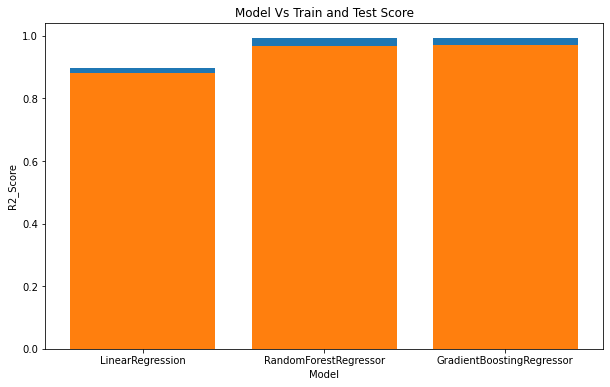

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(final_data['Models'], final_data['R2_Score_Train'], label='R2_Score_Train')
plt.bar(final_data['Models'], final_data['R2_Score_Test'], label='R2_Score_Test')

plt.xlabel('Model')
plt.ylabel('R2_Score')
plt.title('Model Vs Train and Test Score')

From the above comparison and analysis, we can conclude that out of these 3 algorithms Gradient Boosting Regressor model gives best result as Training score is 99% and Testing score is 97%. It is neither overfitting nor underfitting.